# Twitter senitment analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## loading dataset

In [2]:
df = pd.read_csv('training_data.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


## Preprocessing the dataset

In [4]:
# removing pattern in the input text
def remove_pattern(input_text, pattern):
  r = re.findall(pattern, input_text)
  for word in r:
    input_text = re.sub(word, "", input_text)
  return input_text

In [5]:
# removing twitter handles (user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

#removing special char, punctuaions and numbers
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")

# removing shorter words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if  len(w)>3]) )

df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [6]:
# tokenizing words
tokenized_tweet = df['clean_tweet'].apply( lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [7]:
# stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply( lambda sentence: [stemmer.stem(words) for words in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [8]:
# combining words into sentence
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i] = " ".join(tokenized_tweet[i])

df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


## Exploratory data analysis

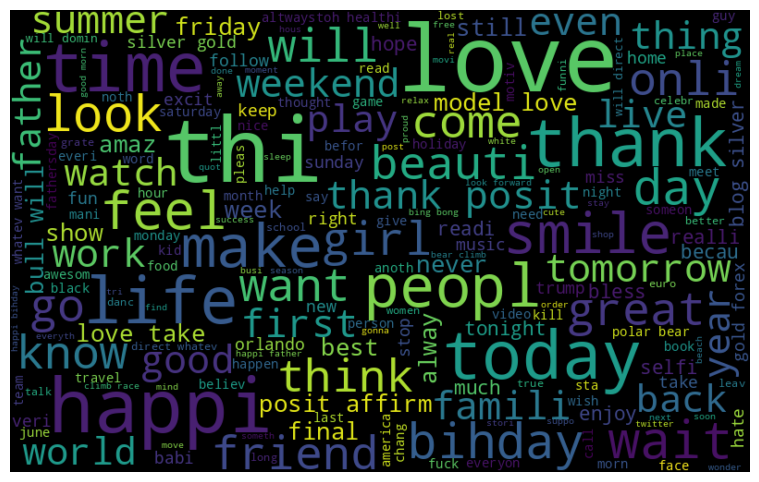

In [9]:
# visualizing frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet'] ])

from wordcloud import WordCloud
wordcloud = WordCloud( width=800, height=500, random_state=42, max_font_size=100 ).generate(all_words)

# plotting graph
plt.figure(figsize= (14,6 ))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

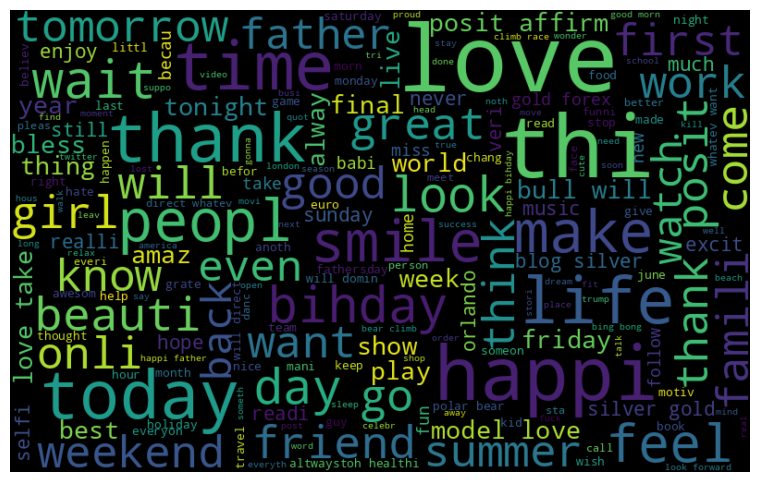

In [10]:
# frequent word visualizing +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0] ])

wordcloud = WordCloud( width=800, height=500, random_state=42, max_font_size=100 ).generate(all_words)

# plotting graph
plt.figure(figsize= (14,6 ))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

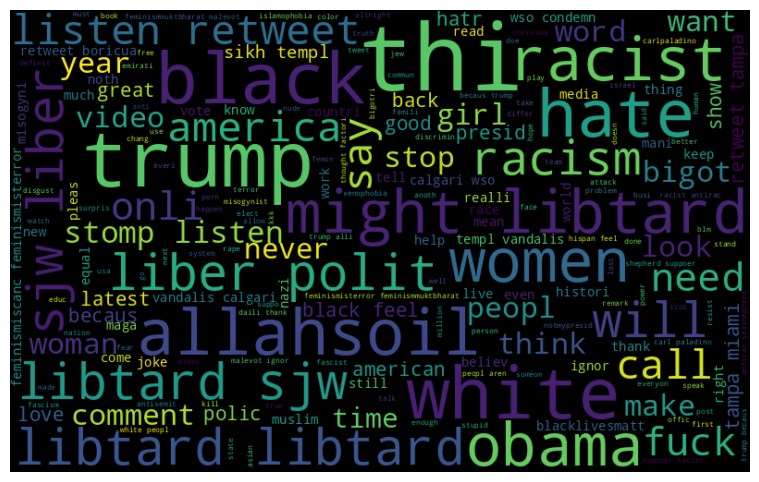

In [11]:
# frequent word visualizing -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1] ])

wordcloud = WordCloud( width=800, height=500, random_state=42, max_font_size=100 ).generate(all_words)

# plotting graph
plt.figure(figsize= (14,6 ))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
# Extracting hashtag
def extract_hashtag(tweets):
  hashtags = []
  # looping words in tweet
  for tweet in tweets:
    ht = re.findall(r"#(\w+)", tweet)
    hashtags.append(ht)
  return hashtags

In [13]:
# extracting hashtags for postive tweets
ht_positive = extract_hashtag(df['clean_tweet'][df['label']==0] )

# extracting hashtags for negative tweets
ht_negative = extract_hashtag(df['clean_tweet'][df['label']==1] )

In [14]:
ht_positive[:10]

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 []]

In [15]:
# unnesting list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [16]:
print("Positive Hastags: ",ht_positive[:9])
print("Negative Hastags: ",ht_negative[:9])

Positive Hastags:  ['run', 'lyft', 'disapoint', 'getthank', 'model', 'motiv', 'allshowandnogo', 'school', 'exam']
Negative Hastags:  ['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay', 'seashepherd', 'helpcovedolphin', 'thecov', 'helpcovedolphin']


In [17]:
# Positive tweets counting
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame( {'Hashtag': list(freq.keys()), 'Count': list(freq.values()) } )

d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


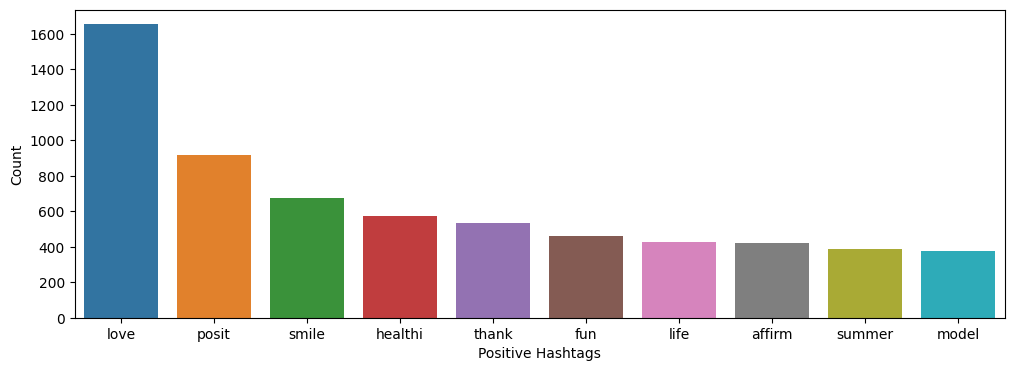

In [18]:
# Plotting top 10 Positive Hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(12, 4))
ax = sns.barplot(data=d, x='Hashtag', y='Count')
ax.set(xlabel='Positive Hashtags', ylabel='Count')
# plt.xticks(rotation=45)
plt.show()

In [19]:
# Negative tweets counting
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame( {'Hashtag': list(freq.keys()), 'Count': list(freq.values()) } )

d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


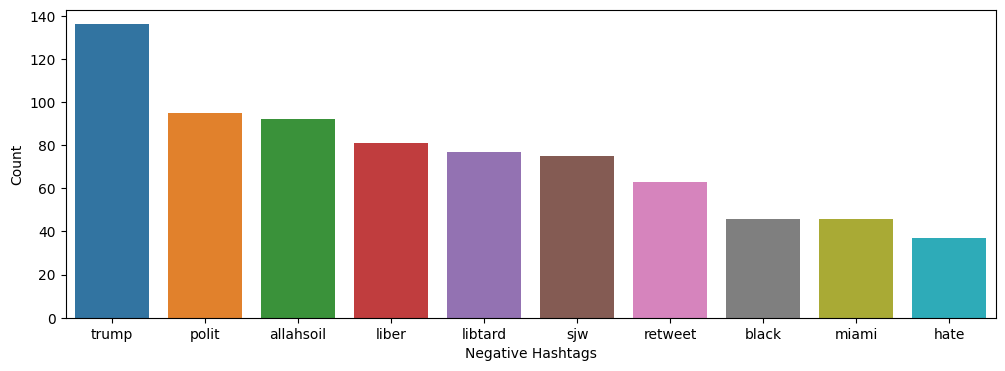

In [20]:
# Plotting top 10 Negative Hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(12, 4))
ax = sns.barplot(data=d, x='Hashtag', y='Count')
ax.set(xlabel='Negative Hashtags', ylabel='Count')
# plt.xticks(rotation=45)
plt.show()

## Input Split

In [21]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [22]:
# bow[0].toarray()

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

## Model Training

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [25]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [26]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.49763033175355453

In [27]:
accuracy_score(y_test,pred)

0.9469403078463271

In [28]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

0.5545722713864307

In [29]:
accuracy_score(y_test,pred)

0.9433112251282693

In [30]:
pred_prob[0][1] >= 0.3

False